# 실습1 - 비트코인 데이터 다루기.

---
## (1)ccxt 

- ccxt는 여러 거래소의 정보를 불러오는 라이브러리다.

## (2)mplfinance

- mplfinance는 matplotlib에서 좀 더 시장 그래프에 맞게 그려주는 라이브러리다.

---

    위 두 라이브러리를 이용하여 실제 시장의 과거 비트코인 정보를 plot 해보자.

In [1]:
import ccxt
import pandas as pd
import mplfinance as mpf

    bybit의 정보를 가져오는 코드이다.

In [2]:
binance = ccxt.bybit()

### parameter

(1)O: Open의 줄임말로 시가를 뜻한다.

(2)H: High의 줄임말로 고가를 뜻한다.

(3)L: Low의 줄임말로 저가를 뜻한다.

(4)C: Close의 줄임말로 종가를 뜻한다.

(5)V: Volume의 줄임말로 거래량을 뜻한다.

(6)timestamp: 데이터를 불러올 시간 단위를 뜻한다.

(7)limit: 가져올 데이터의 갯수를 뜻한다.

---


fetch_ohlcv('코인종류', 시간단위, 갯수)는 각 파라미터들을 불러오는 함수이다.

In [3]:
ohlcv = binance.fetch_ohlcv('BTC/USDT', timeframe = '1h', limit = 100)
ohlcv[0]

[1752973200000, 117941.1, 118132.5, 117888.2, 117937.6, 155.174729]

위의 결과와 같이 ohlcv에 저장되는 type은 list형태이고, 해당 반환값의 첫번째 열은 Unix 기준 시간

1970-01-01 00:00:00 으로 부터 ms(밀리초)로 연산된 값이다.

우리는 보기 편하게 ms를 실제 날짜처럼 반환 할 수 있다.

In [4]:
from datetime import datetime
for row in ohlcv:
    timestamp_ms = row[0]
    timestamp_s = timestamp_ms / 1000
    dt = datetime.utcfromtimestamp(timestamp_s)
    row[0] = dt

ohlcv[0]


/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_14366/2524010982.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(timestamp_s)


[datetime.datetime(2025, 7, 20, 1, 0),
 117941.1,
 118132.5,
 117888.2,
 117937.6,
 155.174729]

조금더 깔끔하게 바꾸기 위해 pandas의 모듈을 이용하면 더 쉽다.

    - pandas의 to_datetime은 datetime의 모듈과 다른 모듈임을 인지하자

In [14]:
df = pd.DataFrame(ohlcv, columns = ['date', 'open', 'high' , 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df

,date,open,high,low,close,volume
0,2025-07-20 01:00:00,117941.1,118132.5,117888.2,117937.6,155.174729
1,2025-07-20 02:00:00,117937.6,118022.2,117770.6,117988.2,134.616002
2,2025-07-20 03:00:00,117988.2,118175.7,117737.3,117965.2,247.589393
3,2025-07-20 04:00:00,117965.2,118138.0,117891.5,117960.9,111.669120
4,2025-07-20 05:00:00,117960.9,117987.4,117808.6,117857.4,83.502948
...,...,...,...,...,...,...
95,2025-07-24 00:00:00,118748.8,119120.5,118564.3,119047.7,351.878753
96,2025-07-24 01:00:00,119047.7,119099.9,118773.9,119079.4,177.439467
97,2025-07-24 02:00:00,119079.4,119079.4,118801.9,118954.7,208.666550
98,2025-07-24 03:00:00,118954.7,119263.9,118468.4,118494.8,392.553504


앞으로 데이터를 다룰때 date 기준으로 다루므로 index를 date로 설정하자.

In [15]:
df.set_index('date', inplace = True) 
df

,open,high,low,close,volume
date,,,,,
2025-07-20 01:00:00,117941.1,118132.5,117888.2,117937.6,155.174729
2025-07-20 02:00:00,117937.6,118022.2,117770.6,117988.2,134.616002
2025-07-20 03:00:00,117988.2,118175.7,117737.3,117965.2,247.589393
2025-07-20 04:00:00,117965.2,118138.0,117891.5,117960.9,111.669120
2025-07-20 05:00:00,117960.9,117987.4,117808.6,117857.4,83.502948
...,...,...,...,...,...
2025-07-24 00:00:00,118748.8,119120.5,118564.3,119047.7,351.878753
2025-07-24 01:00:00,119047.7,119099.9,118773.9,119079.4,177.439467
2025-07-24 02:00:00,119079.4,119079.4,118801.9,118954.7,208.666550


mpf를 이용하여 plot해보자.

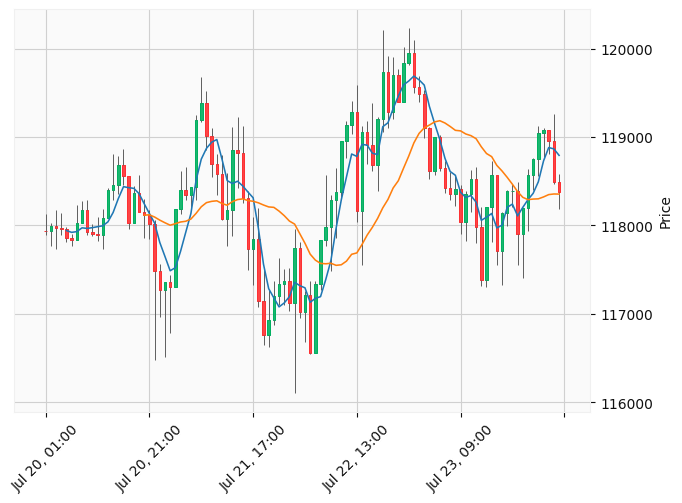

In [17]:
mpf.plot(df, type = 'candle', volume = False, mav = (5, 20), style = 'yahoo')